In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("wine-dataset.csv")

In [3]:
data.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

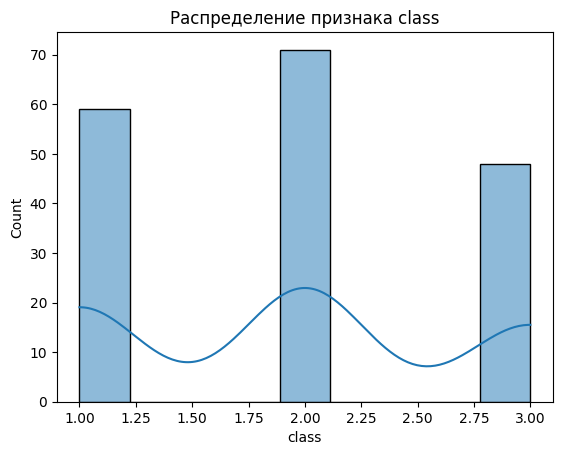

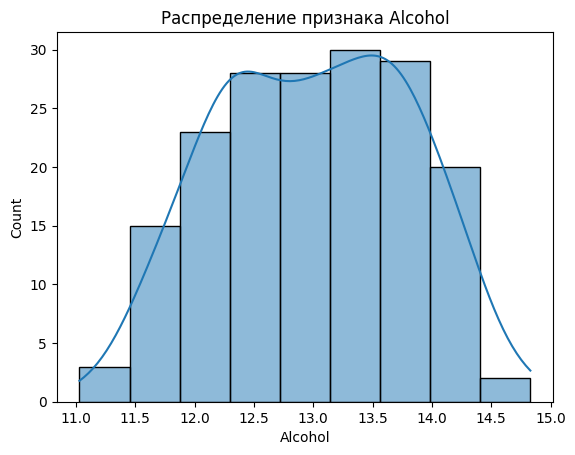

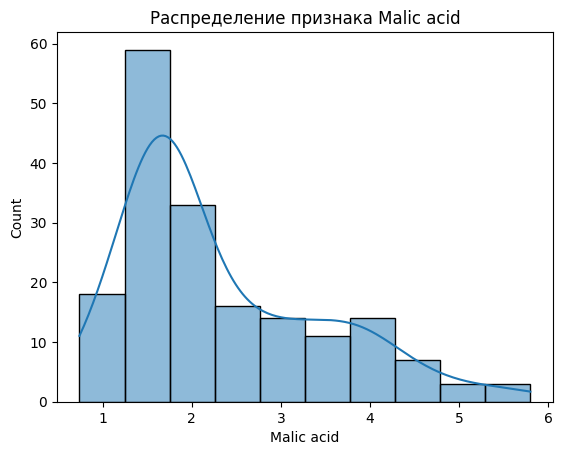

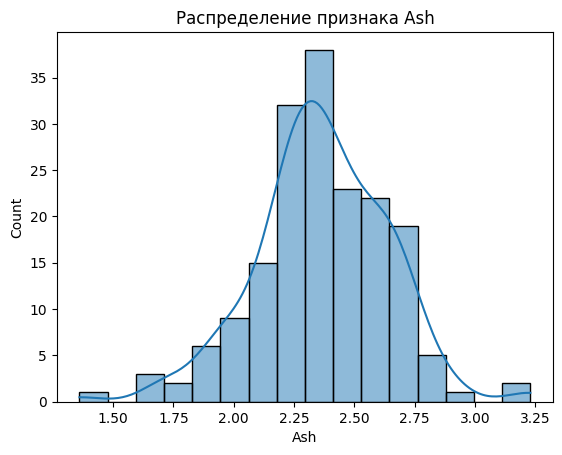

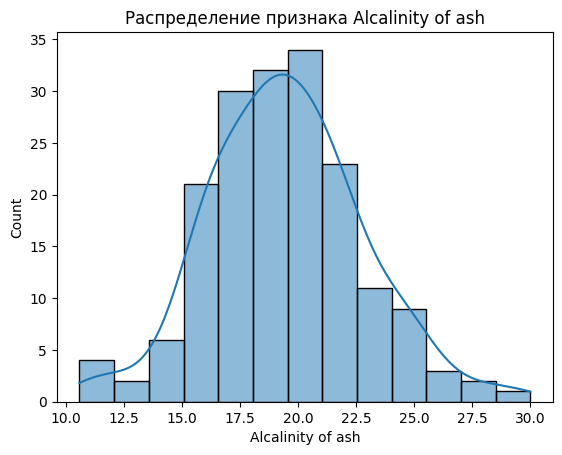

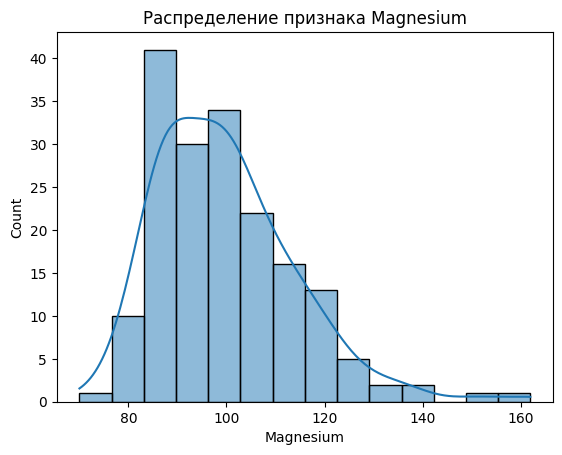

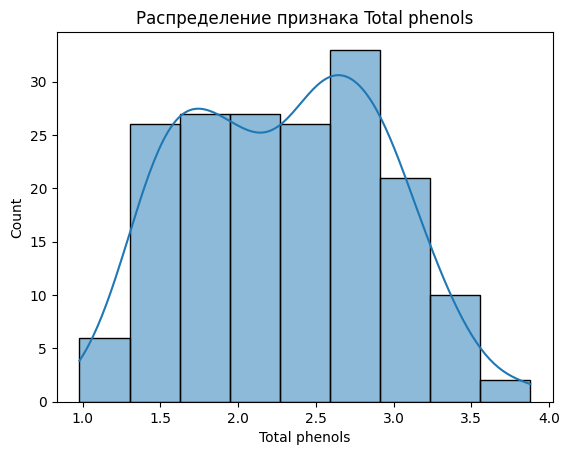

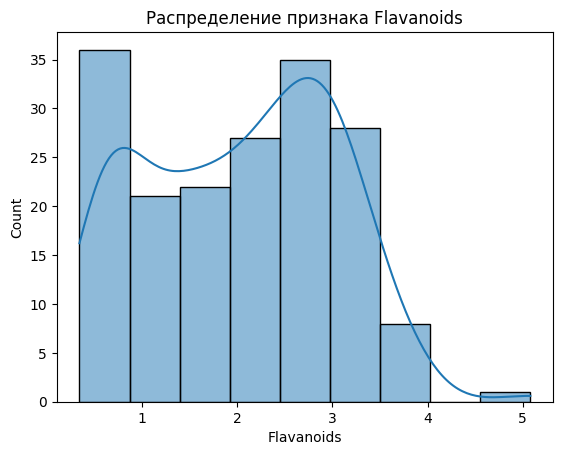

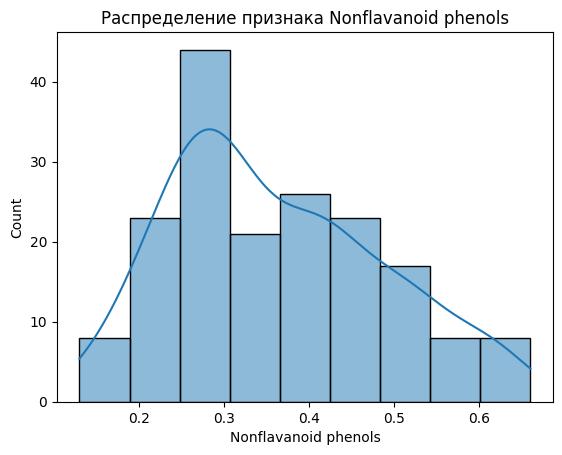

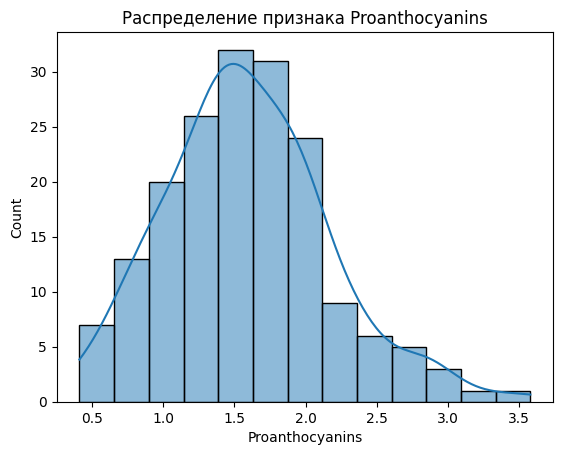

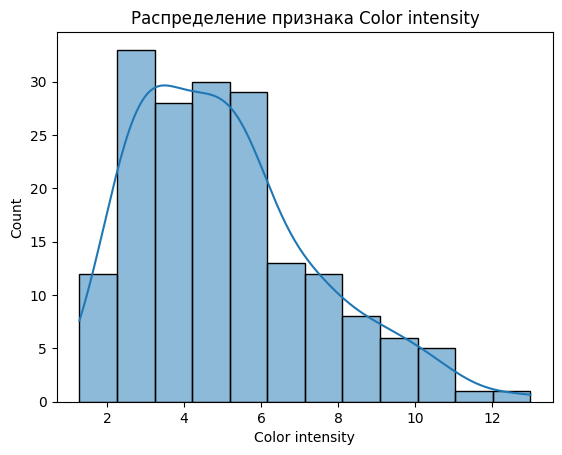

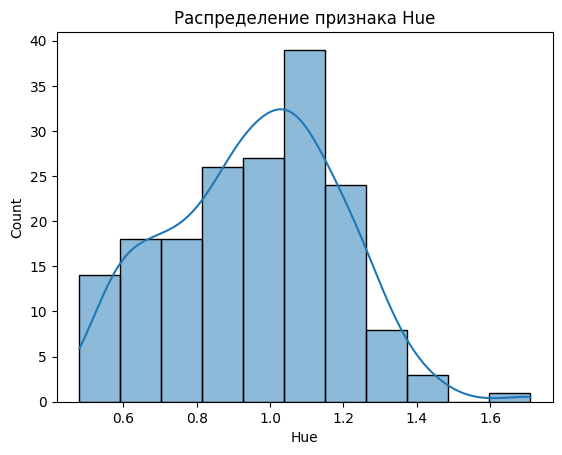

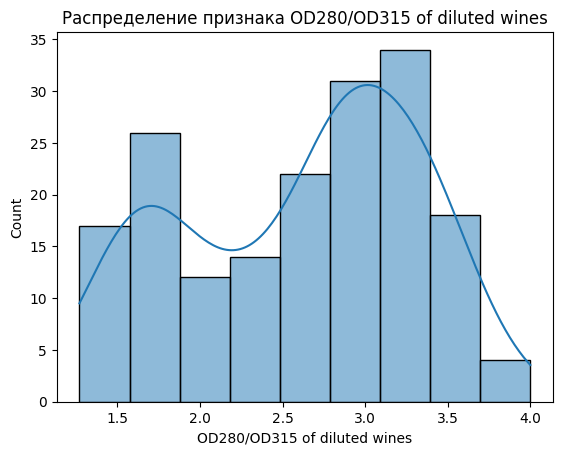

In [7]:
for feature in data.columns[1:]:
    sns.histplot(data=data, x=feature, kde=True)
    plt.title(f"Распределение признака {feature}")
    plt.show()

In [8]:
print("Пропущенные значения (missing values):\n", data.isnull().sum())

Пропущенные значения (missing values):
 class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64


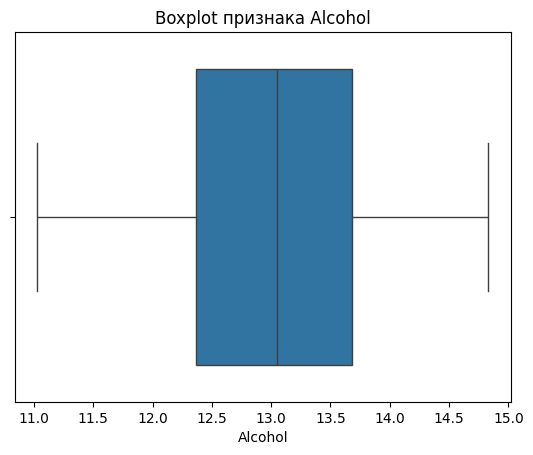

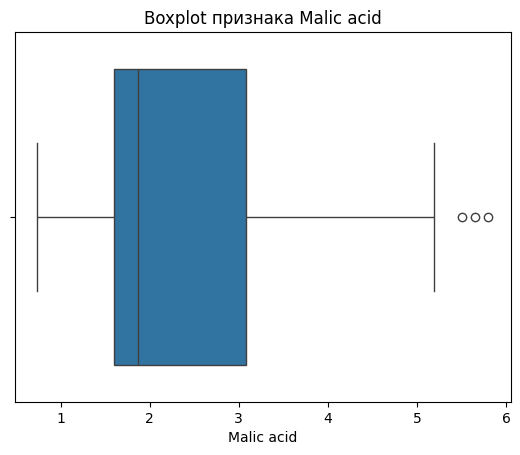

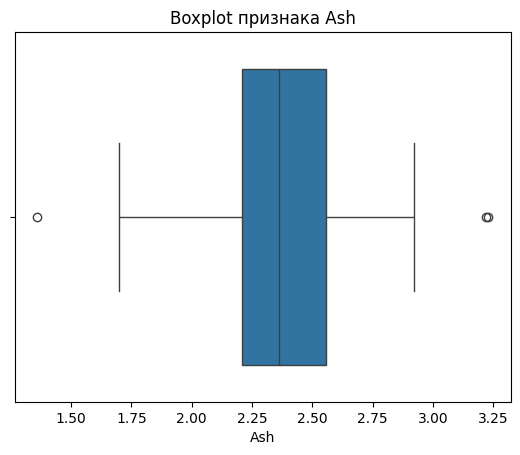

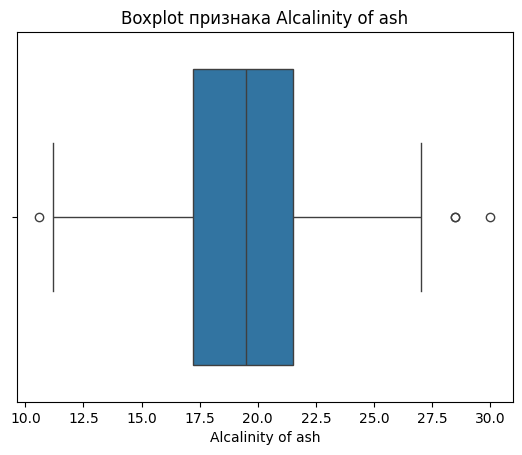

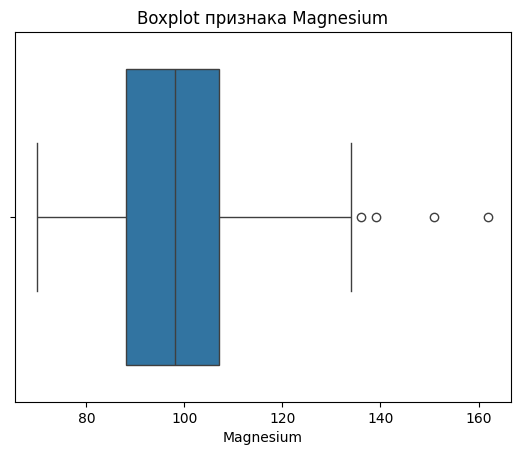

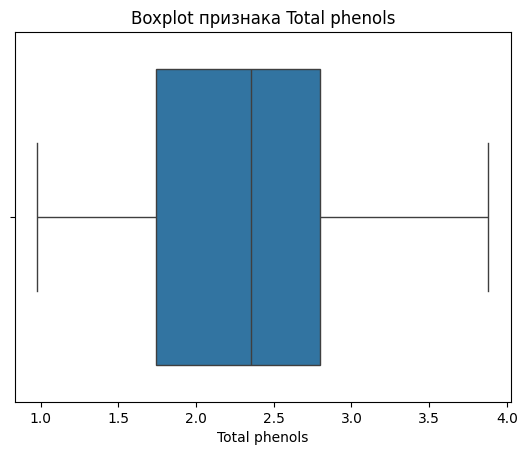

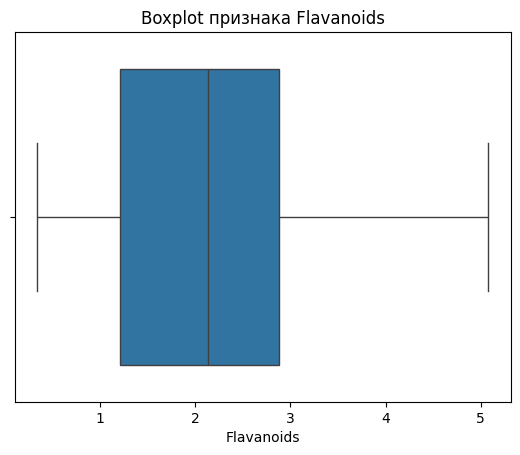

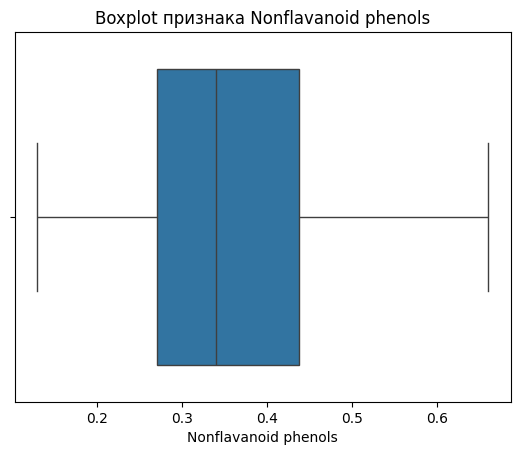

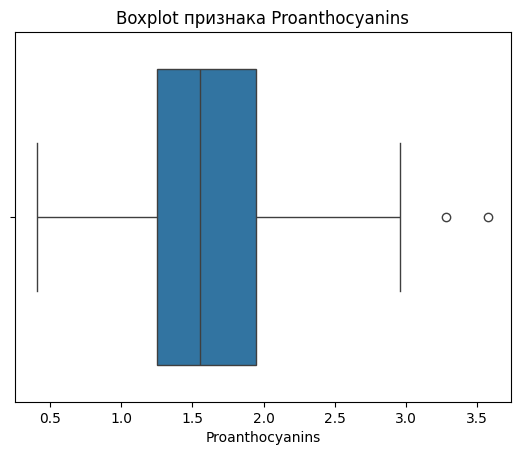

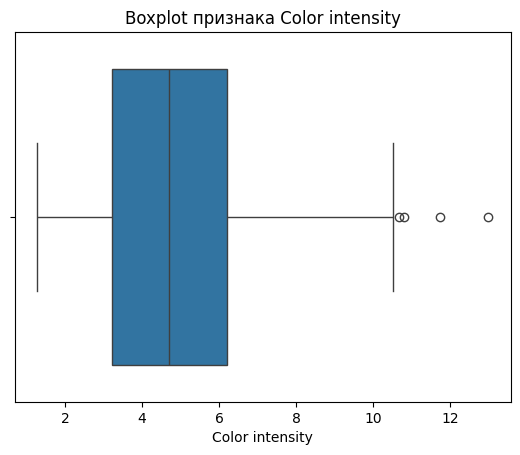

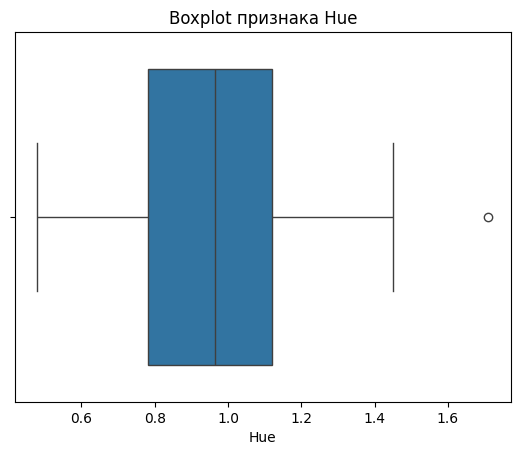

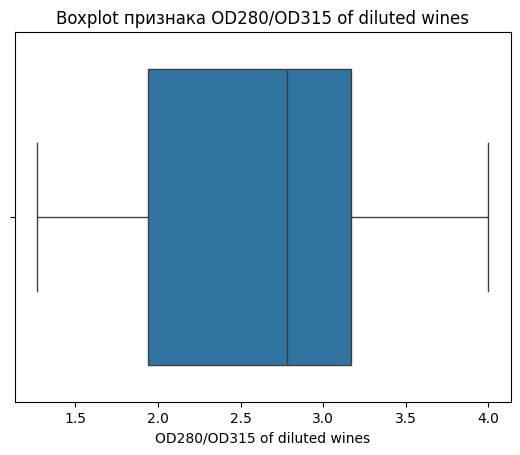

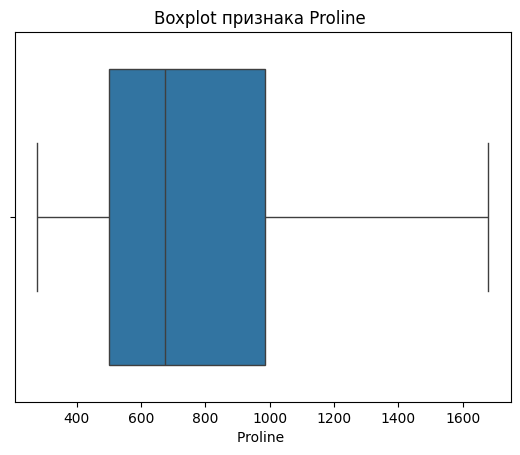

In [9]:
for feature in data.columns[1:]:
    sns.boxplot(data=data, x=feature)
    plt.title(f"Boxplot признака {feature}")
    plt.show()

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

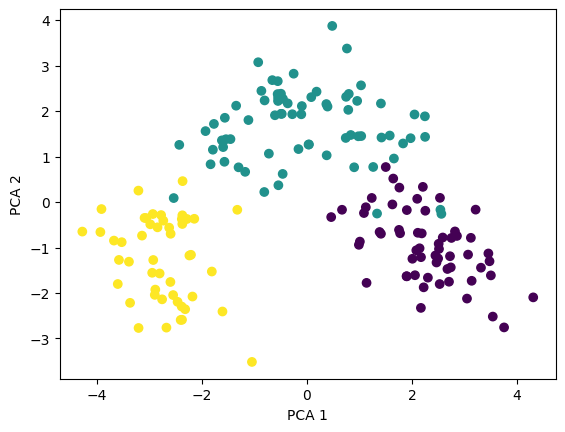

In [12]:
X = data.drop("class", axis=1)
y = data["class"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [17]:
nb_pred = nb_classifier.predict(X_test)

In [18]:
print("Accuracy: ", accuracy_score(y_test, nb_pred))
print("Precision: ", precision_score(y_test, nb_pred, average="macro"))
print("Recall: ", recall_score(y_test, nb_pred, average="macro"))
print("F1-score: ", f1_score(y_test, nb_pred, average="macro"))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-score:  1.0
